In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
!nvidia-smi

Thu Apr 14 10:33:51 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   36C    P8    27W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
!pip install --upgrade gdown

In [ ]:
import os, json
import math
import matplotlib.pyplot as plt

#### Downloading Dataset

In [ ]:
if os.path.isdir('/content/drive/MyDrive/Univ.AI/AI2/Project/Dataset'):
  print('Found dataset')
else:
  os.makedirs('/content/drive/MyDrive/Univ.AI/AI2/Project/Dataset')
  !gdown --id 1EH3p84xKMs_2m4ISSR7aHOQz61yxIv8L
  !unzip /content/Post-hurricane.zip  -d /content/drive/MyDrive/Univ.AI/AI2/Project/Dataset

Found dataset


#### Create train test datagenerators

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow import keras

In [ ]:
train_gen = ImageDataGenerator(rotation_range=360, # rotation
        width_shift_range=0.2, # horizontal shift
        height_shift_range=0.2, # vertical shift
        vertical_flip=True,
        zoom_range=0.2, # zoom
        horizontal_flip=True, # horizontal flip
        brightness_range=[0.2,1.2]) # brightness)

val_gen = ImageDataGenerator(rotation_range=360, # rotation
        width_shift_range=0.2, # horizontal shift
        height_shift_range=0.2, # vertical shift
        vertical_flip=True,
        zoom_range=0.2, # zoom
        horizontal_flip=True, # horizontal flip
        brightness_range=[0.2,1.2]) # brightness)

test_gen = ImageDataGenerator(rotation_range=360, # rotation
        width_shift_range=0.2, # horizontal shift
        height_shift_range=0.2, # vertical shift
        vertical_flip=True,
        zoom_range=0.2, # zoom
        horizontal_flip=True, # horizontal flip
        brightness_range=[0.2,1.2]) # brightness)

train_data = train_gen.flow_from_directory(
    '/content/drive/MyDrive/Univ.AI/AI2/Project/Dataset/train_another',
    target_size = (128,128),
    color_mode = 'rgb',
    class_mode = 'categorical',
    shuffle = True,
    seed=2020
)

val_data = val_gen.flow_from_directory(
    '/content/drive/MyDrive/Univ.AI/AI2/Project/Dataset/validation_another',
    target_size = (128,128),
    color_mode = 'rgb',
    class_mode = 'categorical',
    shuffle = True,
    seed=2020
)

test_data = test_gen.flow_from_directory(
    '/content/drive/MyDrive/Univ.AI/AI2/Project/Dataset/test',
    target_size = (128,128),
    color_mode = 'rgb',
    class_mode = 'categorical',
    shuffle = True,
    seed=2020
)

Found 10000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


## Model Selection

#### AlexNet Architecture

In [ ]:
alex_model = keras.models.Sequential([
    keras.layers.Conv2D(filters=96, kernel_size=(11,11), strides=(4,4), activation='relu', input_shape=(128,128,3)),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(4096, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(4096, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(2, activation='sigmoid')
])
alex_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.000001),
    loss='binary_crossentropy',
    metrics=['accuracy','Recall']
)

In [ ]:
alex_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 96)        34944     
                                                                 
 batch_normalization (BatchN  (None, 30, 30, 96)       384       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 96)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 256)       614656    
                                                                 
 batch_normalization_1 (Batc  (None, 14, 14, 256)      1024      
 hNormalization)                                                 
                                                        

In [ ]:
batch_size=128
epochs=300
callback = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    patience=20,
    verbose=0,
    restore_best_weights=True,
)

history = alex_model.fit(train_data,epochs=epochs,validation_data=val_data, batch_size=batch_size, steps_per_epoch=math.ceil(10000/batch_size), validation_steps=math.ceil(2000/batch_size), callbacks=[callback])


Epoch 1/300
79/79 [==============================] - 15s 196ms/step - loss: 0.9286 - accuracy: 0.5215 - recall: 0.5458 - val_loss: 0.6885 - val_accuracy: 0.5703 - val_recall: 0.4434
Epoch 2/300
79/79 [==============================] - 14s 183ms/step - loss: 0.8617 - accuracy: 0.5360 - recall: 0.5617 - val_loss: 0.6702 - val_accuracy: 0.6270 - val_recall: 0.5332
Epoch 3/300
79/79 [==============================] - 14s 184ms/step - loss: 0.8469 - accuracy: 0.5688 - recall: 0.5641 - val_loss: 0.6640 - val_accuracy: 0.6230 - val_recall: 0.5957
Epoch 4/300
79/79 [==============================] - 14s 180ms/step - loss: 0.8274 - accuracy: 0.6067 - recall: 0.5736 - val_loss: 0.6339 - val_accuracy: 0.6797 - val_recall: 0.6562
Epoch 5/300
79/79 [==============================] - 14s 181ms/step - loss: 0.8225 - accuracy: 0.6111 - recall: 0.5812 - val_loss: 0.6088 - val_accuracy: 0.6680 - val_recall: 0.6367
Epoch 6/300
79/79 [==============================] - 15s 187ms/step - loss: 0.8017 - accur

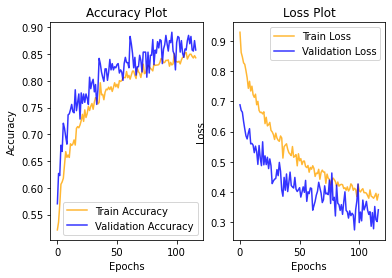

In [ ]:
epochs_run = len(history.history['val_loss'])
fig, ax = plt.subplots(1,2)
ax[0].plot(range(epochs_run), history.history['accuracy'], color='orange', alpha=0.8, label='Train Accuracy')
ax[0].plot(range(epochs_run), history.history['val_accuracy'], color='blue', alpha=0.8, label='Validation Accuracy' )
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")
ax[0].set_title("Accuracy Plot")

ax[1].plot(range(epochs_run), history.history['loss'], color='orange', alpha=1.8, label='Train Loss')
ax[1].plot(range(epochs_run), history.history['val_loss'], color='blue', alpha=1.8, label='Validation Loss' )
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Loss")
ax[1].set_title("Loss Plot")

plt.show()

In [ ]:
alex_model.save("/content/drive/MyDrive/Univ.AI/AI2/Project/Models/alex_model.h5")

###### Load Model

In [ ]:
alex_model = tf.keras.models.load_model("/content/drive/MyDrive/Univ.AI/AI2/Project/Models/alex_model.h5")

In [ ]:
alex_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 96)        34944     
                                                                 
 batch_normalization (BatchN  (None, 30, 30, 96)       384       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 96)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 256)       614656    
                                                                 
 batch_normalization_1 (Batc  (None, 14, 14, 256)      1024      
 hNormalization)                                                 
                                                        

In [ ]:
alex_model.evaluate(test_data)

63/63 [==============================] - 378s 6s/step - loss: 0.3486 - accuracy: 0.8535 - recall: 0.8520


[0.3486160933971405, 0.8535000085830688, 0.8519999980926514]

#### Sharpen Images

##### Intuition:
From the dataset images we observe that the satellite images are blurry and sharpening them might get a higher accuracy

In [ ]:
import os
from PIL import Image
from PIL import ImageFilter

[]

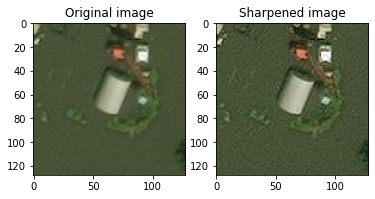

In [ ]:
fig, ax = plt.subplots(1,2)
ax[0].imshow(Image.open("/content/drive/MyDrive/Univ.AI/AI2/Project/Dataset/train_another/damage/-93.79353_30.038519.jpeg"))
ax[0].set_title("Original image")

ax[1].imshow(Image.open("/content/drive/MyDrive/Univ.AI/AI2/Project/Sharpened_Dataset/train_another/damage/-93.79353_30.038519.jpeg"))
ax[1].set_title("Sharpened image")

plt.plot()

In [ ]:
from tqdm import tqdm
if not os.path.isdir("/content/drive/MyDrive/Univ.AI/AI2/Project/Sharpened_Dataset"):
  for r, d, f in tqdm(os.walk("/content/drive/MyDrive/Univ.AI/AI2/Project/Dataset")):
    for file_ in tqdm(f, leave=False):
      if "jpeg" in file_:
        image = Image.open(os.path.join(r,file_))
        sharpened = image.filter(ImageFilter.SHARPEN);
        # plt.imshow(image)
        os.makedirs(os.path.join("/content/drive/MyDrive/Univ.AI/AI2/Project/Sharpened_Dataset", r.split("/")[-2], r.split("/")[-1]), exist_ok=True)
        sharpened.save(os.path.join("/content/drive/MyDrive/Univ.AI/AI2/Project/Sharpened_Dataset", r.split("/")[-2], r.split("/")[-1], file_))

0it [00:00, ?it/s]
0it [00:00, ?it/s]
                  
  0%|          | 0/1 [00:00<?, ?it/s]
                                     
100%|█████████▉| 4995/5000 [01:13<00:00, 62.90it/s]
3it [01:13, 24.65s/it]
100%|██████████| 5000/5000 [01:22<00:00, 56.26it/s]
4it [02:36, 43.31s/it]
  0%|          | 0/1 [00:00<?, ?it/s]
                                     
100%|█████████▉| 997/1000 [00:15<00:00, 68.72it/s]
6it [02:51, 26.24s/it]
 99%|█████████▉| 993/1000 [00:14<00:00, 63.87it/s]
7it [03:06, 23.31s/it]
0it [00:00, ?it/s]
                  
100%|█████████▉| 999/1000 [00:15<00:00, 62.87it/s]
9it [03:22, 16.78s/it]
100%|█████████▉| 999/1000 [00:14<00:00, 68.20it/s]
10it [03:37, 16.33s/it]
0it [00:00, ?it/s]
                  
100%|█████████▉| 997/1000 [00:15<00:00, 65.71it/s]
12it [03:52, 12.89s/it]
100%|█████████▉| 7997/8000 [02:20<00:00, 52.32it/s]
13it [06:13, 28.72s/it]


In [ ]:
sharp_train_gen = ImageDataGenerator(rotation_range=360, # rotation
        width_shift_range=0.2, # horizontal shift
        height_shift_range=0.2, # vertical shift
        vertical_flip=True,
        zoom_range=0.2, # zoom
        horizontal_flip=True, # horizontal flip
        brightness_range=[0.2,1.2]) # brightness)

sharp_val_gen = ImageDataGenerator(rotation_range=360, # rotation
        width_shift_range=0.2, # horizontal shift
        height_shift_range=0.2, # vertical shift
        vertical_flip=True,
        zoom_range=0.2, # zoom
        horizontal_flip=True, # horizontal flip
        brightness_range=[0.2,1.2]) # brightness)

sharp_test_gen = ImageDataGenerator(rotation_range=360, # rotation
        width_shift_range=0.2, # horizontal shift
        height_shift_range=0.2, # vertical shift
        vertical_flip=True,
        zoom_range=0.2, # zoom
        horizontal_flip=True, # horizontal flip
        brightness_range=[0.2,1.2]) # brightness)

sharp_train_data = sharp_train_gen.flow_from_directory(
    '/content/drive/MyDrive/Univ.AI/AI2/Project/Sharpened_Dataset/train_another',
    target_size = (128,128),
    color_mode = 'rgb',
    class_mode = 'categorical',
    shuffle = True,
    seed=2020
)

sharp_val_data = sharp_val_gen.flow_from_directory(
    '/content/drive/MyDrive/Univ.AI/AI2/Project/Sharpened_Dataset/validation_another',
    target_size = (128,128),
    color_mode = 'rgb',
    class_mode = 'categorical',
    shuffle = True,
    seed=2020
)

sharp_test_data = sharp_test_gen.flow_from_directory(
    '/content/drive/MyDrive/Univ.AI/AI2/Project/Sharpened_Dataset/test',
    target_size = (128,128),
    color_mode = 'rgb',
    class_mode = 'categorical',
    shuffle = True,
    seed=2020
)

Found 10000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [ ]:
sharp_alex_model = keras.models.Sequential([
    keras.layers.Conv2D(filters=96, kernel_size=(11,11), strides=(4,4), activation='relu', input_shape=(128,128,3)),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(4096, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(4096, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(2, activation='sigmoid')
])
sharp_alex_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.000001),
    loss='binary_crossentropy',
    metrics=['accuracy','Recall']
)

In [ ]:
batch_size=128
epochs=300
callback = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    patience=20,
    verbose=0,
    restore_best_weights=True,
)

history = sharp_alex_model.fit(sharp_train_data,epochs=epochs,validation_data=sharp_val_data, batch_size=batch_size, steps_per_epoch=math.ceil(10000/batch_size), validation_steps=math.ceil(2000/batch_size), callbacks=[callback])


Epoch 1/300
79/79 [==============================] - 34s 362ms/step - loss: 0.9786 - accuracy: 0.4992 - recall: 0.4074 - val_loss: 0.6963 - val_accuracy: 0.4785 - val_recall: 0.3906
Epoch 2/300
79/79 [==============================] - 26s 333ms/step - loss: 0.8787 - accuracy: 0.5621 - recall: 0.5384 - val_loss: 0.6683 - val_accuracy: 0.6055 - val_recall: 0.6250
Epoch 3/300
79/79 [==============================] - 27s 340ms/step - loss: 0.8470 - accuracy: 0.5977 - recall: 0.5645 - val_loss: 0.6376 - val_accuracy: 0.6270 - val_recall: 0.7168
Epoch 4/300
79/79 [==============================] - 28s 345ms/step - loss: 0.8020 - accuracy: 0.6481 - recall: 0.5896 - val_loss: 0.6150 - val_accuracy: 0.6660 - val_recall: 0.7480
Epoch 5/300
79/79 [==============================] - 27s 345ms/step - loss: 0.7873 - accuracy: 0.6392 - recall: 0.5934 - val_loss: 0.5855 - val_accuracy: 0.6836 - val_recall: 0.7617
Epoch 6/300
79/79 [==============================] - 27s 336ms/step - loss: 0.7495 - accur

In [ ]:
sharp_alex_model.save("/content/drive/MyDrive/Univ.AI/AI2/Project/Models/sharp_alex_model.h5")


##### Load Model

In [ ]:
sharp_alex_model = tf.keras.models.load("/content/drive/MyDrive/Univ.AI/AI2/Project/Models/sharp_alex_model.h5")

In [ ]:
sharp_alex_model.evaluate(test_data)

63/63 [==============================] - 17s 277ms/step - loss: 0.4058 - accuracy: 0.8320 - recall: 0.8430


[0.405802845954895, 0.8320000171661377, 0.8429999947547913]

### VGG16 Architecture

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.applications import Xception
from glob2 import glob


from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Flatten, Activation
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.optimizers import Adam, SGD


In [ ]:
vgg = tf.keras.applications.VGG16(
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    input_shape=(128, 128, 3),
    pooling=None,
    classes=2,
    classifier_activation="softmax",
)

In [ ]:
from tensorflow.keras.layers import Input,Lambda,Dense,Flatten,Dropout

for layer in vgg.layers:
    layer.trainable = False

x = Flatten()(vgg.output)

In [ ]:
from tensorflow.keras.models import Model
# prediction = Dense(128,activation='relu')(x)
# prediction = Dropout(0.3)(prediction)
# prediction = Dense(64,activation='relu')(prediction)
# prediction = Dropout(0.1)(prediction)
prediction = Dense(2,activation='softmax')(x)
model = Model(inputs= vgg.input,outputs=prediction)

In [ ]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 64, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 32, 32, 128)       0   

In [ ]:
model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy','Recall'])
#model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
train_data.class_indices

{'damage': 0, 'no_damage': 1}

In [ ]:
#batch_size=128
#epochs=300
callback = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    patience=5,
    verbose=0,
    restore_best_weights=True,
)

In [ ]:
history = model.fit(train_data,validation_data=val_data,epochs=100,steps_per_epoch=len(train_data),validation_steps=len(val_data),callbacks=[callback])

Epoch 1/100
313/313 [==============================] - 108s 336ms/step - loss: 1.1516 - accuracy: 0.8255 - recall: 0.8255 - val_loss: 1.1600 - val_accuracy: 0.8520 - val_recall: 0.8520
Epoch 2/100
313/313 [==============================] - 101s 322ms/step - loss: 1.0115 - accuracy: 0.8515 - recall: 0.8515 - val_loss: 1.0224 - val_accuracy: 0.8625 - val_recall: 0.8625
Epoch 3/100
313/313 [==============================] - 102s 327ms/step - loss: 1.0008 - accuracy: 0.8564 - recall: 0.8564 - val_loss: 0.8786 - val_accuracy: 0.8710 - val_recall: 0.8710
Epoch 4/100
313/313 [==============================] - 102s 326ms/step - loss: 1.0967 - accuracy: 0.8614 - recall: 0.8614 - val_loss: 0.9414 - val_accuracy: 0.8800 - val_recall: 0.8800
Epoch 5/100
313/313 [==============================] - 102s 325ms/step - loss: 1.0846 - accuracy: 0.8603 - recall: 0.8603 - val_loss: 1.2647 - val_accuracy: 0.8590 - val_recall: 0.8590
Epoch 6/100
313/313 [==============================] - 102s 325ms/step - lo

In [ ]:
model.save("/content/drive/MyDrive/Univ.AI/AI2/Project/Models/vgg16_model.h5")

##### Load Model

In [ ]:
model = tf.keras.models.load("/content/drive/MyDrive/Univ.AI/AI2/Project/Models/vgg16_model.h5")

In [ ]:
model.evaluate(test_data)

63/63 [==============================] - 17s 273ms/step - loss: 0.8501 - accuracy: 0.8575 - recall: 0.8575


[0.850114643573761, 0.8575000166893005, 0.8575000166893005]

### Xception Model

In [ ]:
Xception =tf.keras.applications.Xception(
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    input_shape=(128,128,3),
    pooling=None,
    classes=2,
    classifier_activation="softmax",
)

83697664/83683744 [==============================] - 1s 0us/step


In [ ]:
for layer in Xception.layers:
    layer.trainable = False

In [ ]:
from tensorflow.keras.layers import Input,Lambda,Dense,Flatten,Dropout

y = Flatten()(Xception.output)

In [ ]:
from tensorflow.keras.models import Model
pred = Dense(1024,activation='relu')(y)
pred = Dense(2,activation='softmax')(pred)
model_Xception= Model(inputs= Xception.input,outputs=pred)

In [ ]:
model_Xception.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 63, 63, 32)   864         ['input_3[0][0]']                
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, 63, 63, 32)  128         ['block1_conv1[0][0]']           
 ation)                                                                                           
                                                                                            

In [ ]:
train_data.class_indices

{'damage': 0, 'no_damage': 1}

In [ ]:
model_Xception.compile(optimizer=tf.optimizers.Adam(learning_rate=0.001),loss='binary_crossentropy'
                        ,metrics=['accuracy'
#                        ,'Recall'
                        ])

In [ ]:
#batch_size=128
#epochs=300
callback = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    patience=5,
    verbose=0,
    restore_best_weights=True,
)

In [ ]:
history_Xception = model_Xception.fit(train_data,validation_data=val_data,epochs=10,steps_per_epoch=len(train_data),validation_steps=len(val_data),callbacks=[callback])

In [ ]:
model_Xception.evaluate(test_data)

In [ ]:
model_Xception.save("/content/drive/MyDrive/Univ.AI/AI2/Project/Models/xception_model.h5")

##### Load Model

In [ ]:
from tensorflow import keras
model_Xception = keras.models.load_model("/content/drive/MyDrive/Univ.AI/AI2/Project/Models/xception_model.h5")

### Self Motivated Model

In [ ]:
# Making our  final_model with number of filters in each convolution layer = 32, and using MaxPooling2D with pool_size = (2,2) and BatchNormalization
# Fixing the random seed
# seed(1)
# tf.random.set_seed(1)

final_model = Sequential()

# Convolutional Layer
final_model.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=(128, 128, 3), activation='relu', padding='same'))
# final_model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same'))
final_model.add(BatchNormalization())
# Pooling layer
final_model.add(MaxPooling2D(pool_size=(2, 2)))
# Dropout layers
# final_model.add(Dropout(0.1))

final_model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'))
# final_model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'))
final_model.add(MaxPooling2D(pool_size=(2, 2)))
# final_model.add(Dropout(0.1))

final_model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding='same'))
# final_model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding='same'))
#final_model.add(BatchNormalization())
final_model.add(MaxPooling2D(pool_size=(2, 2)))
# final_model.add(Dropout(0.1))

final_model.add(Flatten())
# final_model.add(Dropout(0.2))
final_model.add(Dense(128, activation='relu'))
#final_model.add(Dropout(0.1))
final_model.add(BatchNormalization())
final_model.add(Dense(2, activation='softmax'))

METRICS = ['accuracy',
#    tf.keras.metrics.Precision(name='precision'),
#    tf.keras.metrics.Recall(name='recall')
]
final_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=METRICS)

In [ ]:
final_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 128, 128, 32)      896       
                                                                 
 batch_normalization_11 (Bat  (None, 128, 128, 32)     128       
 chNormalization)                                                
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 64, 64, 32)       0         
 2D)                                                             
                                                                 
 conv2d_13 (Conv2D)          (None, 64, 64, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 32, 32, 64)       0         
 2D)                                                             
                                                      

In [ ]:
#batch_size=128
#epochs=300
callback = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    patience=10,
    verbose=0,
    restore_best_weights=True,
)

In [ ]:
history_final_model = final_model.fit(
            train_data,
            steps_per_epoch = 100,
            epochs = 100,
            validation_data = val_data,
            validation_steps = 50,
            callbacks=[callback]
)

Epoch 1/100
100/100 [==============================] - 42s 407ms/step - loss: 0.5529 - accuracy: 0.7441 - val_loss: 0.5651 - val_accuracy: 0.7244
Epoch 2/100
100/100 [==============================] - 40s 398ms/step - loss: 0.4321 - accuracy: 0.8156 - val_loss: 0.5033 - val_accuracy: 0.8037
Epoch 3/100
100/100 [==============================] - 40s 398ms/step - loss: 0.3845 - accuracy: 0.8453 - val_loss: 1.0370 - val_accuracy: 0.6587
Epoch 4/100
100/100 [==============================] - 39s 396ms/step - loss: 0.3454 - accuracy: 0.8644 - val_loss: 0.5550 - val_accuracy: 0.7325
Epoch 5/100
100/100 [==============================] - 41s 408ms/step - loss: 0.3430 - accuracy: 0.8550 - val_loss: 0.3578 - val_accuracy: 0.8719
Epoch 6/100
100/100 [==============================] - 40s 404ms/step - loss: 0.3452 - accuracy: 0.8640 - val_loss: 0.4033 - val_accuracy: 0.8256
Epoch 7/100
100/100 [==============================] - 40s 404ms/step - loss: 0.3068 - accuracy: 0.8737 - val_loss: 0.6611 -

In [ ]:
final_model.evaluate(test_data)


63/63 [==============================] - 16s 249ms/step - loss: 0.3187 - accuracy: 0.8670


[0.31866520643234253, 0.8669999837875366]

In [ ]:
final_model.save("/content/drive/MyDrive/Univ.AI/AI2/Project/Models/self_motivated.h5")

In [ ]:
from tensorflow import keras
final_model = keras.models.load_model("/content/drive/MyDrive/Univ.AI/AI2/Project/Models/self_motivated.h5")

### Cao and Choe
#### Research Paper Link - https://link.springer.com/article/10.1007/s11069-020-04133-2?noAccess=true

In [ ]:
# Importing libraries
import numpy as np
from keras.preprocessing.image import load_img
import keras
import h5py
import PIL.Image
import os, shutil
from keras.models import load_model
from keras import layers
from keras import models
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from keras.preprocessing import image
import matplotlib.pyplot as plt
from keras.layers import LeakyReLU
from keras.regularizers import l2
import matplotlib.pyplot as plt
import tensorflow as tf
%matplotlib inline

In [ ]:
#try with Adam optimizer
CaoChoe = models.Sequential()

CaoChoe.add(layers.Conv2D(32,(3,3), activation = 'relu', input_shape = (150,150,3)))
CaoChoe.add(layers.MaxPooling2D((2,2)))

CaoChoe.add(layers.Conv2D(64,(3,3), activation = 'relu'))
CaoChoe.add(layers.MaxPooling2D((2,2)))

CaoChoe.add(layers.Conv2D(128,(3,3), activation = 'relu'))
CaoChoe.add(layers.MaxPooling2D((2,2)))

CaoChoe.add(layers.Conv2D(128,(3,3), activation = 'relu'))
CaoChoe.add(layers.MaxPooling2D((2,2)))

CaoChoe.add(layers.Flatten())

CaoChoe.add(layers.Dropout(0.5))
CaoChoe.add(layers.Dense(512,activation = 'relu'))
CaoChoe.add(layers.Dense(1, activation = 'sigmoid'))

CaoChoe.compile(loss = 'binary_crossentropy',
                optimizer = tf.keras.optimizers.Adam(),
                 metrics = ['acc'])


In [ ]:
CaoChoe.summary()

In [ ]:
#train the model with fit_generator
callback = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    patience=20,
    verbose=0,
    restore_best_weights=True,
)

history = CaoChoe.fit(
            train_data,
            steps_per_epoch = 100,
            epochs = 100,
            validation_data = val_data,
            validation_steps = 50,
            callbacks=[callback],
            verbose=1)

In [ ]:
CaoChoe.save("/content/drive/MyDrive/Univ.AI/AI2/Project/Models/cao&choe.h5")

In [ ]:
CaoChoe.evaluate(test_data)

In [ ]:
#plot loss and accuracy for detection overfitting
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,len(acc)+1)
plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'r', label = 'Validation acc')
plt.title('Training and validation accuracy with data aug and dropout (Adam)')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'r', label = 'Validation loss')
plt.title('Training and validation loss with data aug and dropout (Adam)')
plt.legend()

plt.show()

In [ ]:
CaoChoe = tf.keras.models.load("/content/drive/MyDrive/Univ.AI/AI2/Project/Models/cao&choe.h5")

#### With Batch Normalization

In [ ]:
#try with Adam optimizer and BatchNormalization and Full Dropout
model2 = models.Sequential()
model2.add(layers.Conv2D(32,(3,3), activation = 'relu', input_shape = (150,150,3)))
model2.add(tf.keras.layers.BatchNormalization())
model2.add(layers.MaxPooling2D((2,2)))
model2.add(tf.keras.layers.Dropout(0.25))

model2.add(layers.Conv2D(64,(3,3), activation = 'relu'))
model2.add(tf.keras.layers.BatchNormalization())
model2.add(layers.MaxPooling2D((2,2)))
model2.add(tf.keras.layers.Dropout(0.25))

model2.add(layers.Conv2D(128,(3,3), activation = 'relu'))
model2.add(tf.keras.layers.BatchNormalization())
model2.add(layers.MaxPooling2D((2,2)))
model2.add(tf.keras.layers.Dropout(0.25))

model2.add(layers.Conv2D(128,(3,3), activation = 'relu'))
model2.add(tf.keras.layers.BatchNormalization())
model2.add(layers.MaxPooling2D((2,2)))
model2.add(tf.keras.layers.Dropout(0.25))

model2.add(layers.Flatten())
model2.add(layers.Dropout(0.5))
model2.add(layers.Dense(512,activation = 'relu'))
model2.add(layers.Dense(1, activation = 'sigmoid'))

model2.compile(loss = 'binary_crossentropy',
                optimizer = tf.keras.optimizers.Adam(),
                 metrics = ['acc'])


In [ ]:
model2.summary()

In [ ]:
callback = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    patience=20,
    verbose=0,
    restore_best_weights=True,
)

history2 = model2.fit(
            train_data,
            steps_per_epoch = 100,
            epochs = 100,
            validation_data = val_data,
            validation_steps = 50,
            callbacks=[callback],
            verbose=1)

In [ ]:
#plot loss and accuracy for detection overfitting
import matplotlib.pyplot as plt
acc = history.history2['acc']
val_acc = history.history2['val_acc']
loss = history.history2['loss']
val_loss = history.history2['val_loss']
epochs = range(1,len(acc)+1)
plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'r', label = 'Validation acc')
plt.title('Training and validation accuracy with data aug and dropout (Adam)')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'r', label = 'Validation loss')
plt.title('Training and validation loss with data aug and dropout (Adam)')
plt.legend()

plt.show()

In [ ]:
model2.save('/content/drive/MyDrive/Univ.AI/AI2/Project/Models/Cao&Choe_BatchNormalized&FullDropOut.h5')